# Single Bayesian Optimization

In [1]:
#!pip install scikit-optimize
#!pip install httpimport

import numpy as np 
import matplotlib.pyplot as plt
#from mod3_gen import *
import httpimport

url = 'https://raw.githubusercontent.com/cfteach/brds/main/other/mod3_gen.py'
url2 = 'https://raw.githubusercontent.com/cfteach/brds/main/other/' 
#with httpimport.remote_repo(url):
#    import mod3_gen
module_object = httpimport.load('mod3_gen', url2)

#load an unknown function... BO is agnostic to what is optimizing... 
f = module_object.beale
print_fun = module_object.print_fun

In [ ]:
# uncomment these lines if you want to take a look at the unknown function 
#noise_level = 0.1
#print_fun(f, noise_level=noise_level)



In [12]:
from skopt import gp_minimize

gp_res = gp_minimize(f,                  # the function to minimize
                  [(-4.5, 4.5),(-4.5, 4.5)],      # the bounds on each dimension of x
                  acq_func="gp_hedge",      # the acquisition function
                  n_calls=100,         # the number of evaluations of f
                  n_random_starts=5,  # the number of random initialization points
                  noise=0.**2,       # the noise level (optional)
                  random_state=124)   # the random seed

In [13]:
#"x^*=%.4f, f(x^*)=%.4f" % (res.x[0], res.fun)

#print(res)

print(gp_res.x, gp_res.fun)

[3.0094914834218818, 0.5030984761359134] 2.7571671564361196e-05


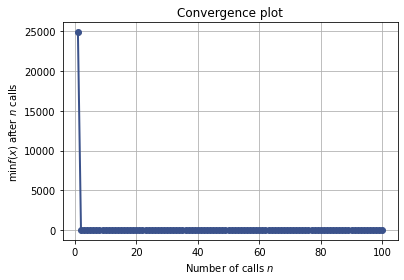

In [14]:
from skopt.plots import plot_convergence
plot_convergence(gp_res);

## Internal behavior of BO

In [ ]:
from skopt.plots import plot_gaussian_process

plt.rcParams["figure.figsize"] = (8, 14)


def f_wo_noise(x):
    return f(x, noise_level=0)

In [ ]:
for n_iter in range(5):
    # Plot true function.
    plt.subplot(5, 2, 2*n_iter+1)

    if n_iter == 0:
        show_legend = True
    else:
        show_legend = False

    ax = plot_gaussian_process(gp_res, n_calls=n_iter,
                               objective=f_wo_noise,
                               noise_level=noise_level,
                               show_legend=show_legend, show_title=False,
                               show_next_point=False, show_acq_func=False)
    ax.set_ylabel("")
    ax.set_xlabel("")
    # Plot EI(x)
    plt.subplot(5, 2, 2*n_iter+2)
    ax = plot_gaussian_process(gp_res, n_calls=n_iter,
                               show_legend=show_legend, show_title=False,
                               show_mu=False, show_acq_func=True,
                               show_observations=False,
                               show_next_point=True)
    ax.set_ylabel("")
    ax.set_xlabel("")

plt.show()

## Compare to Random Search

In [ ]:
from skopt import dummy_minimize

dummy_res = dummy_minimize(f,                  # the function to minimize
                  [(-2.0, 2.0)],      # the bounds on each dimension of x
                  n_calls=25,         # the number of evaluations of f
                  random_state=1234)   # the random seed

In [ ]:
from skopt.plots import plot_convergence

plot = plot_convergence(("dummy_minimize", dummy_res),
                        ("gp_minimize", gp_res))
                        #,true_minimum=0.397887)#, yscale="log")

plot.legend(loc="best", prop={'size': 6}, numpoints=1)